In [3]:
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## FLAVOR NETWORK 

### Load data into nxGraph

In [27]:
# Specify the path to your CSV file
csv_file_path = 'data/ingredients.csv'

# Read the edge list from the CSV file with edge attributes (weights)
df = pd.read_csv(csv_file_path)
G = nx.from_pandas_edgelist(df, source='source', target='target', edge_attr='weight')

### Exploratory Data Analysis - EDA

##### Connected graph?

In [93]:

print(nx.is_connected(G))

isolated_nodes = list(nx.isolates(G))
print('Isolated nodes:', isolated_nodes)

# Find connected components
connected_components = list(nx.connected_components(G))
print("Number of connected components:", len(connected_components))
print(f'Component 0 --> length {len(connected_components[0])}')
for i in range(1,len(connected_components)):
    print(f'Component {i} --> length {len(connected_components[i])} -- {connected_components[i]}')


False
Isolated nodes: []
Number of connected components: 4
Component 0 --> length 1496
Component 1 --> length 7 -- {'quercus_olive', 'rhus_semialata', 'rhus_coriaria', 'sumac', 'rhus_glabra', 'rhus_typhia', 'caesalpinia_spinosa'}
Component 2 --> length 2 -- {'silk_fibrooin', 'gelatin'}
Component 3 --> length 2 -- {'achillea_millefolium', 'artemisia_tridentata'}


In [47]:
## if we work with the first only...

G_bigCC = G.subgraph(connected_components[0])

##### Clustering coefficients

In [89]:
global_clustering = nx.transitivity(G)
local_clustering = nx.clustering(G)
avg_clustering = nx.average_clustering(G)

print(global_clustering)
#print(local_clustering)
print(avg_clustering)

# Global clustering of 0.64
# Local clustering of 0.85 on average --> how much the neighbors connect among themselves

0.6475286369381289
0.8565125118967656


#### Diameter and average path length

In [70]:
def diameter(G):

    source_node = list(G.nodes)[0]  #randomly selected

    # Calculate shortest paths from the source node to all other nodes
    shortest_paths = nx.single_source_shortest_path_length(G, source=source_node)

    # Find the maximum shortest path length
    diameter = max(shortest_paths.values())

    return diameter
 

print("Diameter of the network:", diameter(G))

## Diameter of 3. I can get to any other ingredient by max 3 edges
## !!!!!!


Diameter of the network: 3


#### Closeness centrality

In [50]:
closeness_centrality =nx.closeness_centrality(G)

In [91]:
# how close or how quickly an individual node can reach all other nodes in the network

# Nodes with high CC are influencial, critical
closeness_centrality

sorted_cc = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
print('Top 20: ', list(sorted_cc.keys())[0:20])


Top 20:  ['black_tea', 'green_tea', 'roasted_green_tea', 'bantu_beer', 'fermented_tea', 'beer', 'rooibus_tea', 'strawberry', 'ceylon_tea', 'seychelles_tea', 'dried_black_tea', 'dried_green_tea', 'kola_tea', 'pouching_tea', 'tea', 'jasmine_tea', 'fermented_russian_black_tea', 'brewed_tea', 'white_wine', 'israeli_orange']


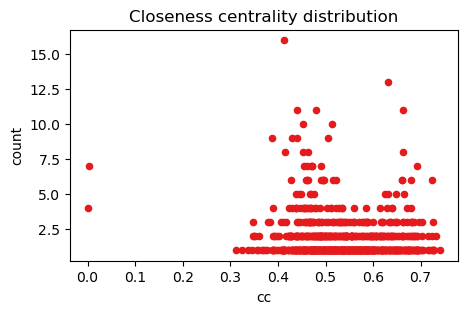

In [82]:
cc = Counter(closeness_centrality.values())
cc = pd.DataFrame(list(cc.items()), columns = ("cc", "count")).sort_values(by = "cc")

cc.plot(kind = "scatter", x = "cc", y = "count", color = "#e41a1c",figsize=(5,3))
plt.title('Closeness centrality distribution')
plt.show()


#meeeehh. no influential points. all have same cc. two dots on the left are
#the three small isolated components. maybe remove

### Average degree

In [92]:
def average_degree(G):
    
    average_degree = nx.average_degree_connectivity(G)
    #print("Average degree:", average_degree)

    total_degree = sum(dict(G.degree()).values())
    num_nodes = len(G.nodes())
    average_degree = total_degree / num_nodes

    print("Overall Average Degree:", average_degree)
    print('Number of ingredients:', num_nodes)
    return

average_degree(G)
# Very dense... each ingredient conects on average with 300 other ingredients
# of the network (20% of the network)

Overall Average Degree: 294.3291307232913
Number of ingredients: 1507


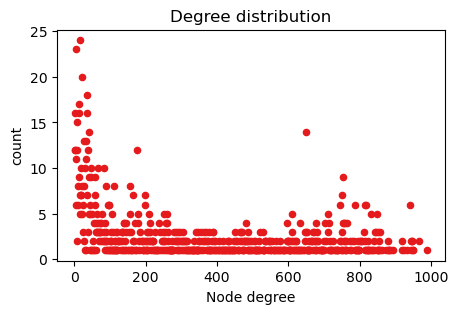

In [81]:
dd = Counter(dict(G.degree).values())
dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")

dd.plot(kind = "scatter", x = "k", y = "count", color = "#e41a1c", figsize=(5,3))
plt.xlabel('Node degree')
plt.title('Degree distribution')
plt.show()

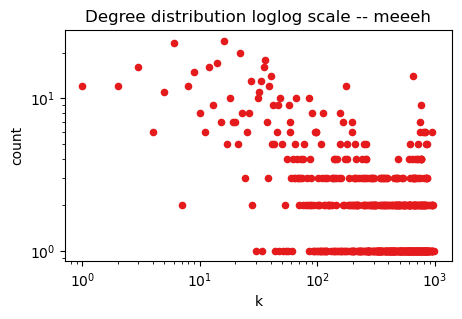

In [83]:
#loglog
dd.plot(kind = "scatter", x = "k", y = "count", color = "#e41a1c", loglog= True, figsize=(5,3))
plt.title('Degree distribution loglog scale -- meeeh')
plt.show()

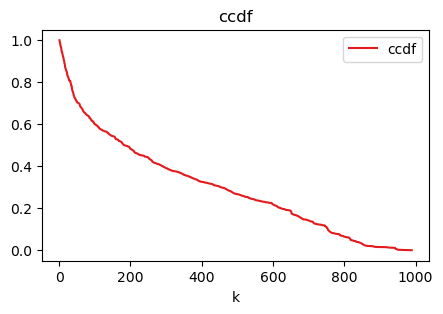

In [87]:
ccdf = dd.sort_values(by = "k", ascending = False)
ccdf["cumsum"] = ccdf["count"].cumsum()
ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c",figsize=(5,3))

plt.title('ccdf');

## ASIAN RECIPES

### Read data

In [88]:
file_name = 'data/asian-recipes.csv'

#3590 recipes

